In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib as ply
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})

In [3]:
from io import BytesIO
import requests

req = requests.get('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')
data = req.content

data_view = pd.read_csv(BytesIO(data))

In [13]:
data_view

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


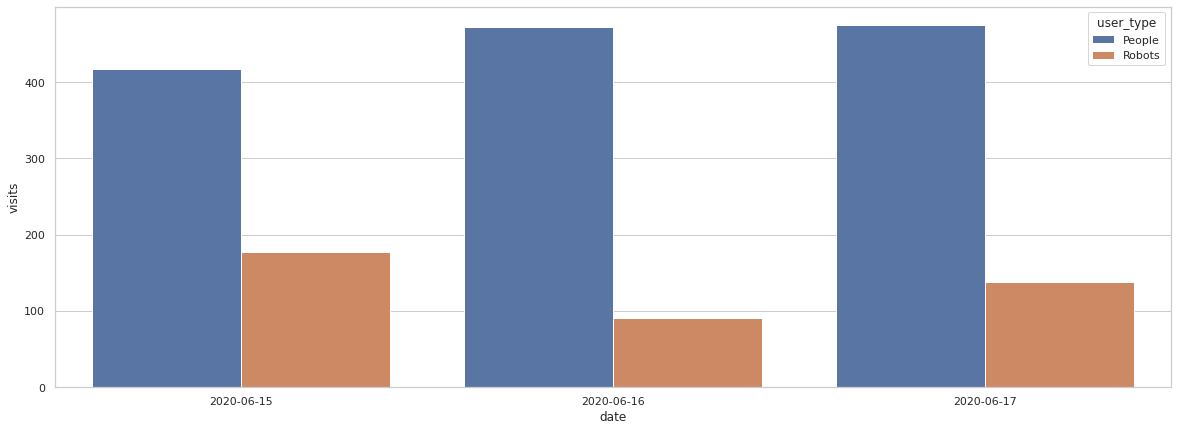

In [15]:
# Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика
sns.barplot(x='date', y='visits', data=data_view, hue = 'user_type')

In [21]:
req = requests.get('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')
data = req.content

yan_vs_chrome = pd.read_csv(BytesIO(data))
yan_vs_chrome

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [29]:
x = yan_vs_chrome.query('browser == "Google Chrome"').visits.sum() / yan_vs_chrome['visits'].sum() *100
round(x, 0)

60.0

с какого браузера приходит больше всего ботов,у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере

In [75]:
req = requests.get('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')
data = req.content
bots = pd.read_csv(BytesIO(data))

bots.head(5)

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


браузер с максимальной долей посещений

In [53]:
bots = bots.pivot(index='browser',columns='user_type', values='visits')
bots = bots.fillna(0)
bots = bots.reset_index()
bots['percent'] = bots.Robots / (bots.People + bots.Robots) * 100
bots.percent.idxmax()

user_type,browser,People,Robots,percent
0,Android Browser,1.0,0.0,0.000000
1,Chrome Mobile,31.0,0.0,0.000000
2,Chromium,1.0,1.0,50.000000
3,CocCoc,1.0,0.0,0.000000
4,Edge,4.0,1.0,20.000000
5,Firefox,27.0,31.0,53.448276
6,Google Chrome,250.0,104.0,29.378531
7,Mobile Safari,15.0,1.0,6.250000
8,Opera,11.0,5.0,31.250000
9,Safari,19.0,22.0,53.658537


In [81]:
# Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
# В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

max_bot_full['total_sum'] = max_bot_full.visits.sum()
max_bot_full['percent_of_total_sum'] = max_bot_full.visits / max_bot_full.total_sum *100
max_bot_full.query("user_type == 'People' & browser == 'Safari'").sort_values('percent', ascending = False).round(1)

,date,browser,user_type,visits,visit_sum,percent,total_sum,percent_of_total_sum
8,2020-06-15,Safari,People,19.0,41.0,46.3,594.0,3.2


In [74]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [83]:
# объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека 
# (отношение visits к users) 
# в разрезе по браузеру и значениям Robots/People.

total_ = df.merge(max_bot_full, how = 'inner', on = ['date','browser', 'user_type'])
total_

,date,browser,user_type,users,visits,visit_sum,percent,total_sum,percent_of_total_sum
0,2020-06-15,Google Chrome,People,240.0,250.0,354.0,70.621469,594.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,104.0,354.0,29.378531,594.0,17.508418
2,2020-06-15,Yandex Browser,People,44.0,47.0,54.0,87.037037,594.0,7.912458
3,2020-06-15,Chrome Mobile,People,30.0,31.0,31.0,100.000000,594.0,5.218855
4,2020-06-15,Firefox,Robots,29.0,31.0,58.0,53.448276,594.0,5.218855
5,2020-06-15,Firefox,People,26.0,27.0,58.0,46.551724,594.0,4.545455
6,2020-06-15,Safari,Robots,20.0,22.0,41.0,53.658537,594.0,3.703704
7,2020-06-15,Safari,People,17.0,19.0,41.0,46.341463,594.0,3.198653
8,2020-06-15,Mobile Safari,People,14.0,15.0,16.0,93.750000,594.0,2.525253
9,2020-06-15,Opera,People,10.0,11.0,16.0,68.750000,594.0,1.851852


In [85]:
total_['visits/users'] = total_.visits / total_.users
total_['visits/users'] = total_['visits/users'].round(0)
total_

,date,browser,user_type,users,visits,visit_sum,percent,total_sum,percent_of_total_sum,visits/users
0,2020-06-15,Google Chrome,People,240.0,250.0,354.0,70.621469,594.0,42.087542,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,354.0,29.378531,594.0,17.508418,1.0
2,2020-06-15,Yandex Browser,People,44.0,47.0,54.0,87.037037,594.0,7.912458,1.0
3,2020-06-15,Chrome Mobile,People,30.0,31.0,31.0,100.000000,594.0,5.218855,1.0
4,2020-06-15,Firefox,Robots,29.0,31.0,58.0,53.448276,594.0,5.218855,1.0
5,2020-06-15,Firefox,People,26.0,27.0,58.0,46.551724,594.0,4.545455,1.0
6,2020-06-15,Safari,Robots,20.0,22.0,41.0,53.658537,594.0,3.703704,1.0
7,2020-06-15,Safari,People,17.0,19.0,41.0,46.341463,594.0,3.198653,1.0
8,2020-06-15,Mobile Safari,People,14.0,15.0,16.0,93.750000,594.0,2.525253,1.0
9,2020-06-15,Opera,People,10.0,11.0,16.0,68.750000,594.0,1.851852,1.0
